In [17]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
mpl.style.use('ggplot') 

In [5]:
rdf = pd.read_csv('raw/Data-Collisions.csv')

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
rdf.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In this step, we should create a new dataframe with needed columns.

In [93]:
df = rdf[["SEVERITYCODE", "ADDRTYPE", "INCDTTM" ,"WEATHER" ,"ROADCOND" ,"LIGHTCOND" ,"UNDERINFL"]]
df.head()

,SEVERITYCODE,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,2,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,N
1,1,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,0
2,1,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,0
3,1,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,N
4,2,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,0


## Data Wrangling

-   Handle missing values
-   Correct data format
-   Standardize and Normalize Data

[False    194673
 Name: SEVERITYCODE, dtype: int64, False    192747
 True       1926
 Name: ADDRTYPE, dtype: int64, False    194673
 Name: INCDTTM, dtype: int64, False    189592
 True       5081
 Name: WEATHER, dtype: int64, False    189661
 True       5012
 Name: ROADCOND, dtype: int64, False    189503
 True       5170
 Name: LIGHTCOND, dtype: int64, False    189789
 True       4884
 Name: UNDERINFL, dtype: int64]

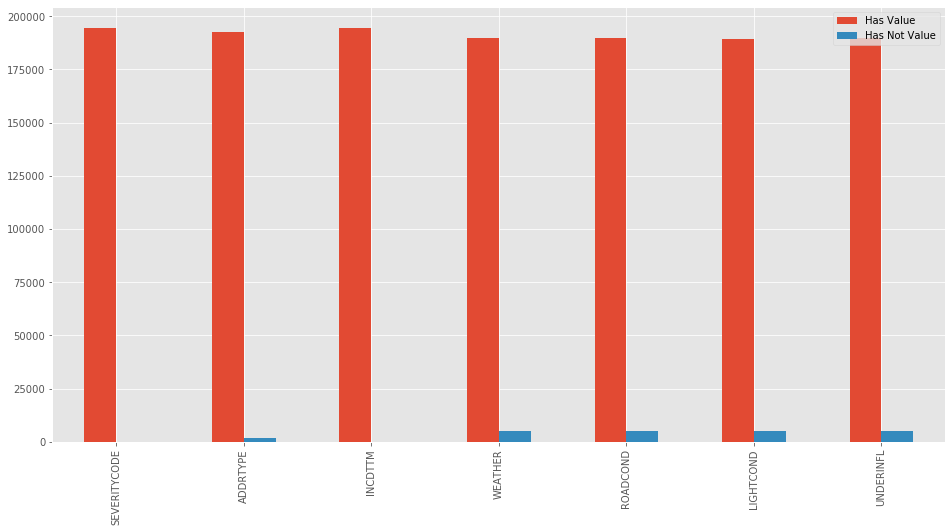

In [94]:
missing = df.isnull()

tf = []

for column in missing.columns.values.tolist():
    #print(column)
    #print (missing[column].value_counts())
    tf.append(missing[column].value_counts())
    
tdf=pd.DataFrame(tf)
tdf.replace(np.nan,0,inplace=True)
tdf.rename(columns={0:'Has Value',1:'Has Not Value'},inplace=True)

tdf.plot(kind='bar',figsize=(16, 8))
plt.savefig('Plot01.png')

tf

### How to deal with missing data?

As the plot is showing, five columns have some null values. In these columns, the rate of null values is minimal. And also, these null values are placed in the critical parameters. So the best strategy is, delete rows that have a null value.

In [24]:
df.dropna(how='any', axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

missing = df.isnull()

tf = []

for column in missing.columns.values.tolist():
    print(column)
    print (missing[column].value_counts())
    tf.append(missing[column].value_counts())
pd.DataFrame([tf])

SEVERITYCODE
False    187525
Name: SEVERITYCODE, dtype: int64
ADDRTYPE
False    187525
Name: ADDRTYPE, dtype: int64
INCDTTM
False    187525
Name: INCDTTM, dtype: int64
WEATHER
False    187525
Name: WEATHER, dtype: int64
ROADCOND
False    187525
Name: ROADCOND, dtype: int64
LIGHTCOND
False    187525
Name: LIGHTCOND, dtype: int64
UNDERINFL
False    187525
Name: UNDERINFL, dtype: int64


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6
0,"False 187525 Name: SEVERITYCODE, dtype: int64","False 187525 Name: ADDRTYPE, dtype: int64","False 187525 Name: INCDTTM, dtype: int64","False 187525 Name: WEATHER, dtype: int64","False 187525 Name: ROADCOND, dtype: int64","False 187525 Name: LIGHTCOND, dtype: int64","False 187525 Name: UNDERINFL, dtype: int64"


In [26]:
lb = LabelEncoder()

WeatherLabel = list(df["WEATHER"].unique())
df["Weather_Code"] = lb.fit_transform(df["WEATHER"])

RoadLabel = list(df["ROADCOND"].unique())
df["Road_Code"] = lb.fit_transform(df["ROADCOND"])

LightLabel = list(df["LIGHTCOND"].unique())
df["Light_Code"] = lb.fit_transform(df["LIGHTCOND"])

df["AddressType_Code"] = lb.fit_transform(df["ADDRTYPE"])
df.drop("ADDRTYPE",axis=1,inplace=True)

InflLabel = list(df["UNDERINFL"].unique())
df["UNDERINFL"].replace('N',0,inplace=True)
df["UNDERINFL"].replace('Y',1,inplace=True)
df["UNDERINFL"].replace('0',0,inplace=True)
df["UNDERINFL"].replace('1',1,inplace=True)

df.drop(["WEATHER","ROADCOND","LIGHTCOND"],axis=1,inplace=True)

df.rename(columns={"UNDERINFL":"INFL_Code"},inplace=True)


KeyError: 'WEATHER'

In [27]:
df.head(10)

,SEVERITYCODE,INCDTTM,INFL_Code,Weather_Code,Road_Code,Light_Code,AddressType_Code
0,2,3/27/2013 2:54:00 PM,0,4,8,5,2
1,1,12/20/2006 6:55:00 PM,0,6,8,2,1
2,1,11/18/2004 10:20:00 AM,0,4,0,5,1
3,1,3/29/2013 9:26:00 AM,0,1,0,5,1
4,2,1/28/2004 8:04:00 AM,0,6,8,5,2
5,1,4/20/2019 5:42:00 PM,0,1,0,5,2
6,1,12/9/2008,0,6,8,5,2
7,2,4/15/2020 5:47:00 PM,0,1,0,5,2
8,1,6/15/2006 1:00:00 PM,0,1,0,5,1
9,2,3/20/2006 3:49:00 PM,0,1,0,5,2


In [28]:
df["Weekday"] = df["INCDTTM"].astype('datetime64[ns]').dt.dayofweek
df["Weekday_Code"] = df["Weekday"].apply(lambda x: x==5 or x==6).astype(int)
df.drop("INCDTTM",axis=1,inplace=True)

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying

In [29]:
df.head(10)

,SEVERITYCODE,INFL_Code,Weather_Code,Road_Code,Light_Code,AddressType_Code,Weekday,Weekday_Code
0,2,0,4,8,5,2,2,0
1,1,0,6,8,2,1,2,0
2,1,0,4,0,5,1,3,0
3,1,0,1,0,5,1,4,0
4,2,0,6,8,5,2,2,0
5,1,0,1,0,5,2,5,1
6,1,0,6,8,5,2,1,0
7,2,0,1,0,5,2,2,0
8,1,0,1,0,5,1,3,0
9,2,0,1,0,5,2,0,0


SEVERITYCODE
1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

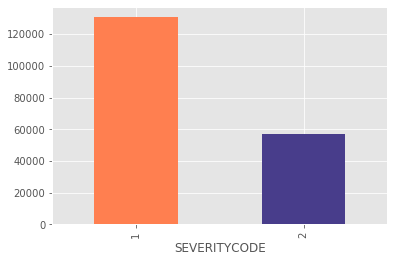

In [80]:
sdf = df.groupby(["SEVERITYCODE"])["SEVERITYCODE"].count()
sdf.plot(kind="bar",color=['coral', 'darkslateblue'])
sdf

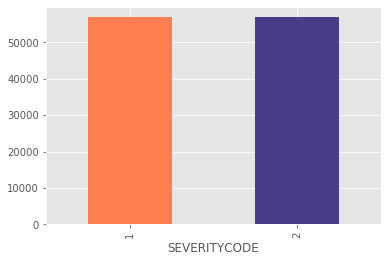

In [31]:
dfmajority = df[df.SEVERITYCODE==1]
dfminority = df[df.SEVERITYCODE==2]

dfmajoritydownsampled = resample(dfmajority, replace=False, n_samples=len(dfminority), random_state=123)
dfdownsampled = pd.concat([dfmajoritydownsampled, dfminority])

sdf = dfdownsampled.groupby(["SEVERITYCODE"])["SEVERITYCODE"].count()
sdf.plot(kind="bar",color=['coral', 'darkslateblue'])


In [32]:
dfdownsampled

,SEVERITYCODE,INFL_Code,Weather_Code,Road_Code,Light_Code,AddressType_Code,Weekday,Weekday_Code
33363,1,0,10,7,8,1,3,0
11702,1,0,1,0,2,1,2,0
110225,1,0,1,0,5,1,5,1
22670,1,0,1,0,5,2,4,0
121567,1,0,1,0,2,1,1,0
...,...,...,...,...,...,...,...,...
187515,2,0,6,8,5,1,2,0
187518,2,0,1,8,5,1,4,0
187520,2,0,1,0,5,1,0,0
187522,2,0,1,0,5,2,5,1


In [35]:
X= np.asarray(dfdownsampled[["INFL_Code","Weather_Code","Road_Code","Light_Code","Weekday_Code","AddressType_Code"]])
Y= np.asarray(dfdownsampled["SEVERITYCODE"])

X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=123)

print("Train Set: " , X_train.shape , Y_train.shape)
print("Test Set: " , X_test.shape , Y_test.shape)

Train Set:  (79636, 6) (79636,)
Test Set:  (34130, 6) (34130,)


In [46]:
Neigh = KNeighborsClassifier(n_neighbors=35).fit(X_train,Y_train)
NeighYhat = Neigh.predict(X_test)

In [78]:
Deci = DecisionTreeClassifier(criterion="entropy",max_depth=10)
Deci.fit(X_train,Y_train)
DeciYhat = Deci.predict(X_test)

In [86]:
LogReg = LogisticRegression(C=10,solver='lbfgs',random_state=34).fit(X_train,Y_train)
LogRegYhat = LogReg.predict(X_test)
LogRegYhatLog = LogReg.predict_proba(X_test)

In [48]:
f1_score(Y_test,NeighYhat)

0.6264132258685665

In [79]:
f1_score(Y_test,DeciYhat)

0.6427979800678655

In [90]:
print(f1_score(Y_test,LogRegYhat))
print(log_loss(Y_test,LogRegYhatLog))

0.6381375319607052
0.6608201104585892
